In [1]:
import pandas as pd
import numpy as np
import scipy 
import seaborn as sns
from matplotlib import pyplot as plt

from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree, fcluster, cophenet
from scipy.spatial.distance import pdist

from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

import sys
sys.setrecursionlimit(10000)

In [2]:
analysis = '/work/projects/ecosystem_biology/archaea/coevolution/analysis'

eggnog = pd.read_csv("/work/projects/ecosystem_biology/archaea/coevolution/analysis/mantis/archaea/archaea_annot_eggnog.tsv", 
            delimiter="\t", header=None, names=['protein', 'id', 'description'])
pfam = pd.read_csv("/work/projects/ecosystem_biology/archaea/coevolution/analysis/mantis/archaea/archaea_annot_pfam.tsv", 
            delimiter="\t", header=None, names=['protein', 'id', 'description'])
kegg = pd.read_csv("/work/projects/ecosystem_biology/archaea/coevolution/analysis/mantis/archaea/archaea_annot_kegg.tsv", 
            delimiter="\t", header=None, names=['protein', 'id', 'description'])

proteins = pd.read_csv('/work/projects/ecosystem_biology/archaea/coevolution/analysis/intermediate_results/instructions_arch_GU_clusters.tsv',
            sep='\t')

proteins.rename(columns={'cluster':'ids'}, inplace=True)

In [3]:
matrix = pd.read_csv('/work/projects/coevolution/phylogeny/smash/arch_uncommon_kegg_ids/analysis/out.csv')
matrix.head()

a_102553.fasta  a_105332.fasta  a_105514.fasta  a_114075.fasta  \
0             1.0        0.000000        0.000000             0.0   
1             0.0        1.000000        0.352941             0.0   
2             0.0        0.352941        1.000000             0.0   
3             0.0        0.000000        0.000000             1.0   
4             0.0        0.000000        0.000000             0.0   

   a_114437.fasta  a_119654.fasta  a_121452.fasta  a_126964.fasta  \
0             0.0             0.0             0.0             0.0   
1             0.0             0.0             0.0             0.0   
2             0.0             0.0             0.0             0.0   
3             0.0             0.0             0.0             0.0   
4             1.0             0.0             0.0             0.0   

   a_135980.fasta  a_146624.fasta  ...  a_6005.fasta  a_60721.fasta  \
0             0.0             0.0  ...      0.000000            0.0   
1             0.0             0.0  ...      0.453488            0.0   
2             0.0             0.0  ...      0.179245            0.0   
3             0.0             0.0  ...      0.000000            0.0   
4             0.0             0.0  ...      0.000000            0.0   

   a_63062.fasta  a_65566.fasta  a_66926.fasta  a_67019.fasta  a_79903.fasta  \
0            0.0       0.000000       0.000000            0.0       0.000000   
1            0.0       0.307087       0.414815            0.0       0.402878   
2            0.0       0.267176       0.232258            0.0       0.226415   
3            0.0       0.000000       0.000000            0.0       0.000000   
4            0.0       0.000000       0.000000            0.0       0.000000   

   a_811.fasta  a_91997.fasta  a_92863.fasta  
0          0.0            0.0       0.387283  
1          0.0            0.0       0.000000  
2          0.0            0.0       0.000000  
3          0.0            0.0       0.000000  
4          0.0            0.0       0.000000  

[5 rows x 44 columns]

In [4]:
labels = matrix.columns
# Perform clustering, you can choose the method
# in this case, we use 'ward'
Z = linkage(matrix)

Text(0.5, 1.0, 'Hierarchical Clustering Dendrogram')

Text(0, 0.5, 'sample id')

Text(0.5, 0, 'distance')

([<matplotlib.axis.XTick at 0x2aab549a9b20>,
 <a list of 33 Text major ticklabel objects>)

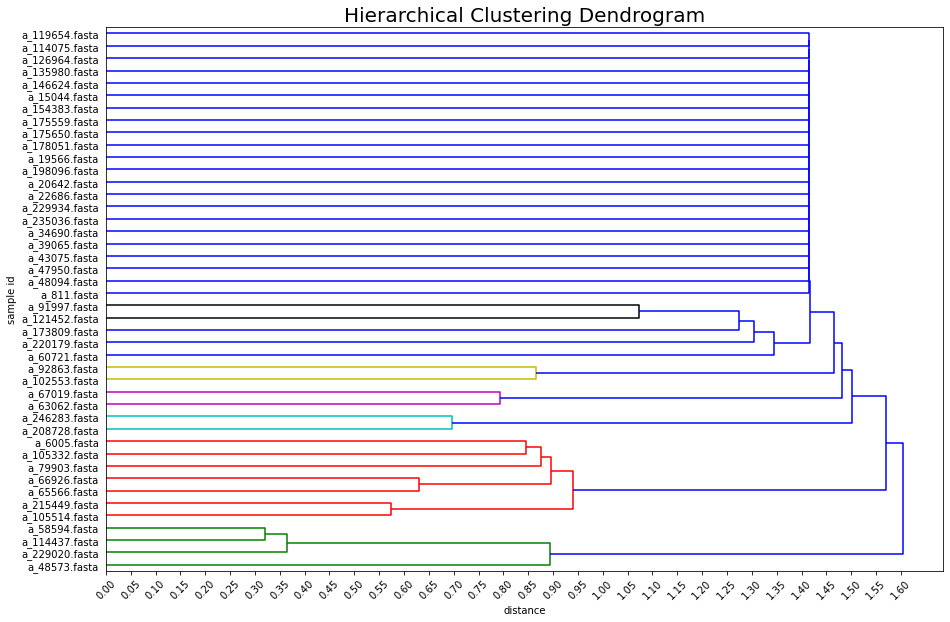

In [5]:
max_d = 1.38

fig = plt.figure(figsize=(15, 10))
dn = dendrogram(Z, 
                orientation='right', 
                labels=labels)
plt.title('Hierarchical Clustering Dendrogram', fontsize=20)
plt.ylabel('sample id', fontsize=10)
plt.xlabel('distance', fontsize=10)
plt.xticks(np.arange(0, 1.65, step=0.05), rotation=45)
plt.tick_params(axis='both', which='major', labelsize=10)
# plt.plot([max_d,max_d], [max_d, 100000], 'y-.', lw=3) 
# plt.savefig('/work/projects/ecosystem_biology/archaea/coevolution/analysis/intermediate_results/pics/dendrogram_1.38.png', 
#             format='png', dpi=150)
plt.show()

In [6]:
max_d = 1.38
clusters = fcluster(Z, max_d, criterion='distance')

clusters = pd.DataFrame(clusters, labels)
clusters.columns = ['cluster']
clusters.reset_index(level=0, inplace=True)
clusters.rename(columns={'index' : 'ids'}, inplace=True)

clusters.ids = clusters.ids.str.rstrip('.fasta')

clusters_count = clusters.groupby('cluster', as_index=False)\
.agg({'ids':'count'})\
.rename(columns={'ids':'count'})\
.sort_values('count', ascending=False)


clusters_count.head()
# clusters.groupby('cluster').agg({'ids':lambda x: list(x)})


# clusters_5plus = clusters_count[clusters_count['count']>=2].merge(clusters, on='cluster')
# clusters_5plus.cluster.nunique()




cluster  count
1        2      7
5        6      5
0        1      4
2        3      2
3        4      2

In [7]:
clusters\
.merge(proteins, on='ids')[['protein', 'cluster']]\
.to_csv('/work/projects/ecosystem_biology/archaea/coevolution/analysis/intermediate_results/instructions_arch_clusters_uncommon_functions_smash.csv',
        sep='\t', index=False, header=None)

In [15]:
protein_clusters_kegg = clusters\
.merge(proteins, on='ids')\
.merge(kegg, on='protein')

protein_clusters_kegg\
.groupby(['cluster', 'id', 'description'], as_index=False)\
.agg({'protein':'count'})\
.rename(columns={'protein':'protein_count'})\
.sort_values('protein_count', ascending=False)

cluster      id                                        description  \
0         1  K20411                             proline-rich protein 5   
1         2  K05439                                          prolactin   
5         6  K13901                                         cystatin-D   
4         5  K22406                                thymine dioxygenase   
12       13  K22208                              (-)-camphene synthase   
2         3  K13959                              kelch-like protein 38   
8         9  K16405              stigmatellin polyketide synthase StiA   
19       19  K11247                                       endophilin-A   
28       28  K11642        chromodomain-helicase-DNA-binding protein 3   
3         4  K12128                        pseudo-response regulator 9   
6         7  K22353                 alkene monooxygenase alpha subunit   
11       12  K23500                                   sideroflexin-1/3   
15       16  K15114            mitochondrial ornithine carrier protein   
16       17  K17774  mitochondrial distribution and morphology prot...   
10       11  K21609                                    metallothionein   
23       23  K06429         small acid-soluble spore protein L (minor)   
22       22  K11482                           histone deacetylase HOS1   
27       27  K17661         cytochrome b pre-mRNA-processing protein 2   
26       26  K22427                        phenylalanine decarboxylase   
25       25  K23128                         HBV large envelope protein   
24       24  K18405            tudor domain-containing protein 1/4/6/7   
9        10  K04966  transient receptor potential cation channel su...   
21       21  K14813                               metalloprotease ARX1   
20       20  K20438               validoxylamine A glucosyltransferase   
17       18  K07409              cytochrome P450 family 1 subfamily A2   
13       14  K13208                            ELAV like protein 2/3/4   
7         8  K04402     growth arrest and DNA-damage-inducible protein   
14       15  K10050      CCAAT/enhancer binding protein (C/EBP), delta   
18       19  K07680  two-component system, NarL family, sensor hist...   

    protein_count  
0              80  
1              22  
5              16  
4               9  
12              9  
2               5  
8               4  
19              4  
28              4  
3               4  
6               4  
11              3  
15              3  
16              3  
10              3  
23              3  
22              2  
27              2  
26              2  
25              2  
24              2  
9               2  
21              2  
20              2  
17              2  
13              2  
7               2  
14              2  
18              1

In [9]:
protein_clusters_egg = clusters\
.merge(proteins, on='ids')\
.merge(eggnog, on='protein')

protein_clusters_egg\
.groupby(['cluster', 'id', 'description'], as_index=False)\
.agg({'protein':'count'})\
.rename(columns={'protein':'protein_count'})

cluster          id                                        description  \
0         1  arCOG10868   double-stranded D endodeoxyribonuclease activity   
1         2       23PFX                        Parallel beta-helix repeats   
2         2       23PGR                    Papain family cysteine protease   
3         5       2Y563              poly(R)-hydroxyalkanoic acid synthase   
4         8       241UT                       archaeal coiled-coil protein   
5        10       2XZJ8  PFAM restriction modification system D specifi...   
6        20       23NQW                 PFAM Glycosyl transferase family 2   
7        20       23PIK                  Glycosyltransferase like family 2   
8        22       2Y41S                    Universal stress protein family   
9        23  arCOG04390  Uncharacterized protein containing a Zn-ribbon...   
10       24       2Y5PD                 Polysaccharide pyruvyl transferase   
11       26  arCOG01695   R-binding protein homologous to eukaryotic snRNP   

    protein_count  
0              80  
1               5  
2               1  
3              29  
4               2  
5               2  
6               2  
7               2  
8               2  
9               3  
10              2  
11              2

In [10]:
protein_clusters_pfam = clusters\
.merge(proteins, on='ids')\
.merge(pfam, on='protein')

protein_clusters_pfam\
.groupby(['cluster', 'id', 'description'], as_index=False)\
.agg({'protein':'count'})\
.rename(columns={'protein':'protein_count'})

cluster       id                                        description  \
0        2  PF02369                 Bacterial Ig-like domain (group 1)   
1        2  PF03207            Borrelia outer surface protein D (OspD)   
2        5  PF00313                    'Cold-shock' DNA-binding domain   
3        9  PF01988   manganese ion transmembrane transporter activity   
4       10  PF08344                  Transient receptor ion channel II   
5       17  PF12519                         mitochondrion organization   
6       20  PF00535                      Glycosyl transferase family 2   
7       23  DUF2116  Uncharacterized protein containing a Zn-ribbon...   
8       24  PF04230                 Polysaccharide pyruvyl transferase   

   protein_count  
0              9  
1              4  
2              9  
3             20  
4              2  
5              1  
6              2  
7              3  
8              2

## plot

In [11]:
plot_all_curated = protein_clusters_kegg\
.groupby(['cluster', 'id', 'description'], as_index=False)\
.agg({'protein':'count'})\
.rename(columns={'protein':'protein_count'})\
.sort_values('protein_count', ascending=False) 

plot_all_curated['arch_cluster_kegg'] = plot_all_curated.cluster.astype(str) + '_' + \
+ plot_all_curated.id.astype(str)

plot_all_curated = plot_all_curated[['arch_cluster_kegg', 'protein_count', 'id', 'description']]

plot_all_curated['protein_count'] = plot_all_curated['protein_count']/1874506*1000000

In [16]:
plot_all_curated

arch_cluster_kegg  protein_count      id  \
0           1_K20411      42.677911  K20411   
1           2_K05439      11.736425  K05439   
5           6_K13901       8.535582  K13901   
4           5_K22406       4.801265  K22406   
12         13_K22208       4.801265  K22208   
2           3_K13959       2.667369  K13959   
8           9_K16405       2.133896  K16405   
19         19_K11247       2.133896  K11247   
28         28_K11642       2.133896  K11642   
3           4_K12128       2.133896  K12128   
6           7_K22353       2.133896  K22353   
11         12_K23500       1.600422  K23500   
15         16_K15114       1.600422  K15114   
16         17_K17774       1.600422  K17774   
10         11_K21609       1.600422  K21609   
23         23_K06429       1.600422  K06429   
22         22_K11482       1.066948  K11482   
27         27_K17661       1.066948  K17661   
26         26_K22427       1.066948  K22427   
25         25_K23128       1.066948  K23128   
24         24_K18405       1.066948  K18405   
9          10_K04966       1.066948  K04966   
21         21_K14813       1.066948  K14813   
20         20_K20438       1.066948  K20438   
17         18_K07409       1.066948  K07409   
13         14_K13208       1.066948  K13208   
7           8_K04402       1.066948  K04402   
14         15_K10050       1.066948  K10050   
18         19_K07680       0.533474  K07680   

                                          description  
0                              proline-rich protein 5  
1                                           prolactin  
5                                          cystatin-D  
4                                 thymine dioxygenase  
12                              (-)-camphene synthase  
2                               kelch-like protein 38  
8               stigmatellin polyketide synthase StiA  
19                                       endophilin-A  
28        chromodomain-helicase-DNA-binding protein 3  
3                         pseudo-response regulator 9  
6                  alkene monooxygenase alpha subunit  
11                                   sideroflexin-1/3  
15            mitochondrial ornithine carrier protein  
16  mitochondrial distribution and morphology prot...  
10                                    metallothionein  
23         small acid-soluble spore protein L (minor)  
22                           histone deacetylase HOS1  
27         cytochrome b pre-mRNA-processing protein 2  
26                        phenylalanine decarboxylase  
25                         HBV large envelope protein  
24            tudor domain-containing protein 1/4/6/7  
9   transient receptor potential cation channel su...  
21                               metalloprotease ARX1  
20               validoxylamine A glucosyltransferase  
17              cytochrome P450 family 1 subfamily A2  
13                            ELAV like protein 2/3/4  
7      growth arrest and DNA-damage-inducible protein  
14      CCAAT/enhancer binding protein (C/EBP), delta  
18  two-component system, NarL family, sensor hist...

In [23]:
plot_all_curated = pd.read_table(analysis+'/intermediate_results/unique_arch_proteins_for_abundance_plot.tsv')
plot_all_curated

arch_cluster_kegg  protein_count      id  \
0          u1_K20411      42.677911  K20411   
1          u2_K05439      11.736425  K05439   
2          u3_K13901       8.535582  K13901   
3          u4_K22406       4.801265  K22406   
4          u5_K22208       4.801265  K22208   
5          u6_K13959       2.667369  K13959   
6          u7_K16405       2.133896  K16405   
7          u8_K11247       2.133896  K11247   
8          u9_K11642       2.133896  K11642   
9         u10_K11642       2.133896  K12128   
10        u11_K22353       2.133896  K22353   
11        u12_K23500       1.600422  K23500   
12        u13_K15114       1.600422  K15114   
13        u14_K15114       1.600422  K17774   
14        u15_K21609       1.600422  K21609   
15        u16_K06429       1.600422  K06429   
16        u17_K11482       1.066948  K11482   
17        u18_K11482       1.066948  K17661   
18        u19_K22427       1.066948  K22427   
19        u20_K23128       1.066948  K23128   
20        u21_K18405       1.066948  K18405   
21        u22_K04966       1.066948  K04966   
22        u23_K14813       1.066948  K14813   
23        u24_K20438       1.066948  K20438   
24        u25_K07409       1.066948  K07409   
25        u26_K13208       1.066948  K13208   
26        u27_K04402       1.066948  K04402   
27        u28_K10050       1.066948  K10050   

                                          description  
0                              proline-rich protein 5  
1                                           prolactin  
2                                          cystatin-D  
3                                 thymine dioxygenase  
4                               (-)-camphene synthase  
5                               kelch-like protein 38  
6               stigmatellin polyketide synthase StiA  
7                                        endophilin-A  
8         chromodomain-helicase-DNA-binding protein 3  
9                         pseudo-response regulator 9  
10                 alkene monooxygenase alpha subunit  
11                                   sideroflexin-1/3  
12            mitochondrial ornithine carrier protein  
13  mitochondrial distribution and morphology prot...  
14                                    metallothionein  
15         small acid-soluble spore protein L (minor)  
16                           histone deacetylase HOS1  
17         cytochrome b pre-mRNA-processing protein 2  
18                        phenylalanine decarboxylase  
19                         HBV large envelope protein  
20            tudor domain-containing protein 1/4/6/7  
21  transient receptor potential cation channel su...  
22                               metalloprotease ARX1  
23               validoxylamine A glucosyltransferase  
24              cytochrome P450 family 1 subfamily A2  
25                            ELAV like protein 2/3/4  
26     growth arrest and DNA-damage-inducible protein  
27      CCAAT/enhancer binding protein (C/EBP), delta

<BarContainer object of 28 artists>

Text(0, 0.5, 'relative protein counts')

Text(0.5, 1.0, 'Relative abundance of unique archaeal proteins\n')

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27],
 <a list of 28 Text major ticklabel objects>)

(array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40., 45.]),
 <a list of 10 Text major ticklabel objects>)

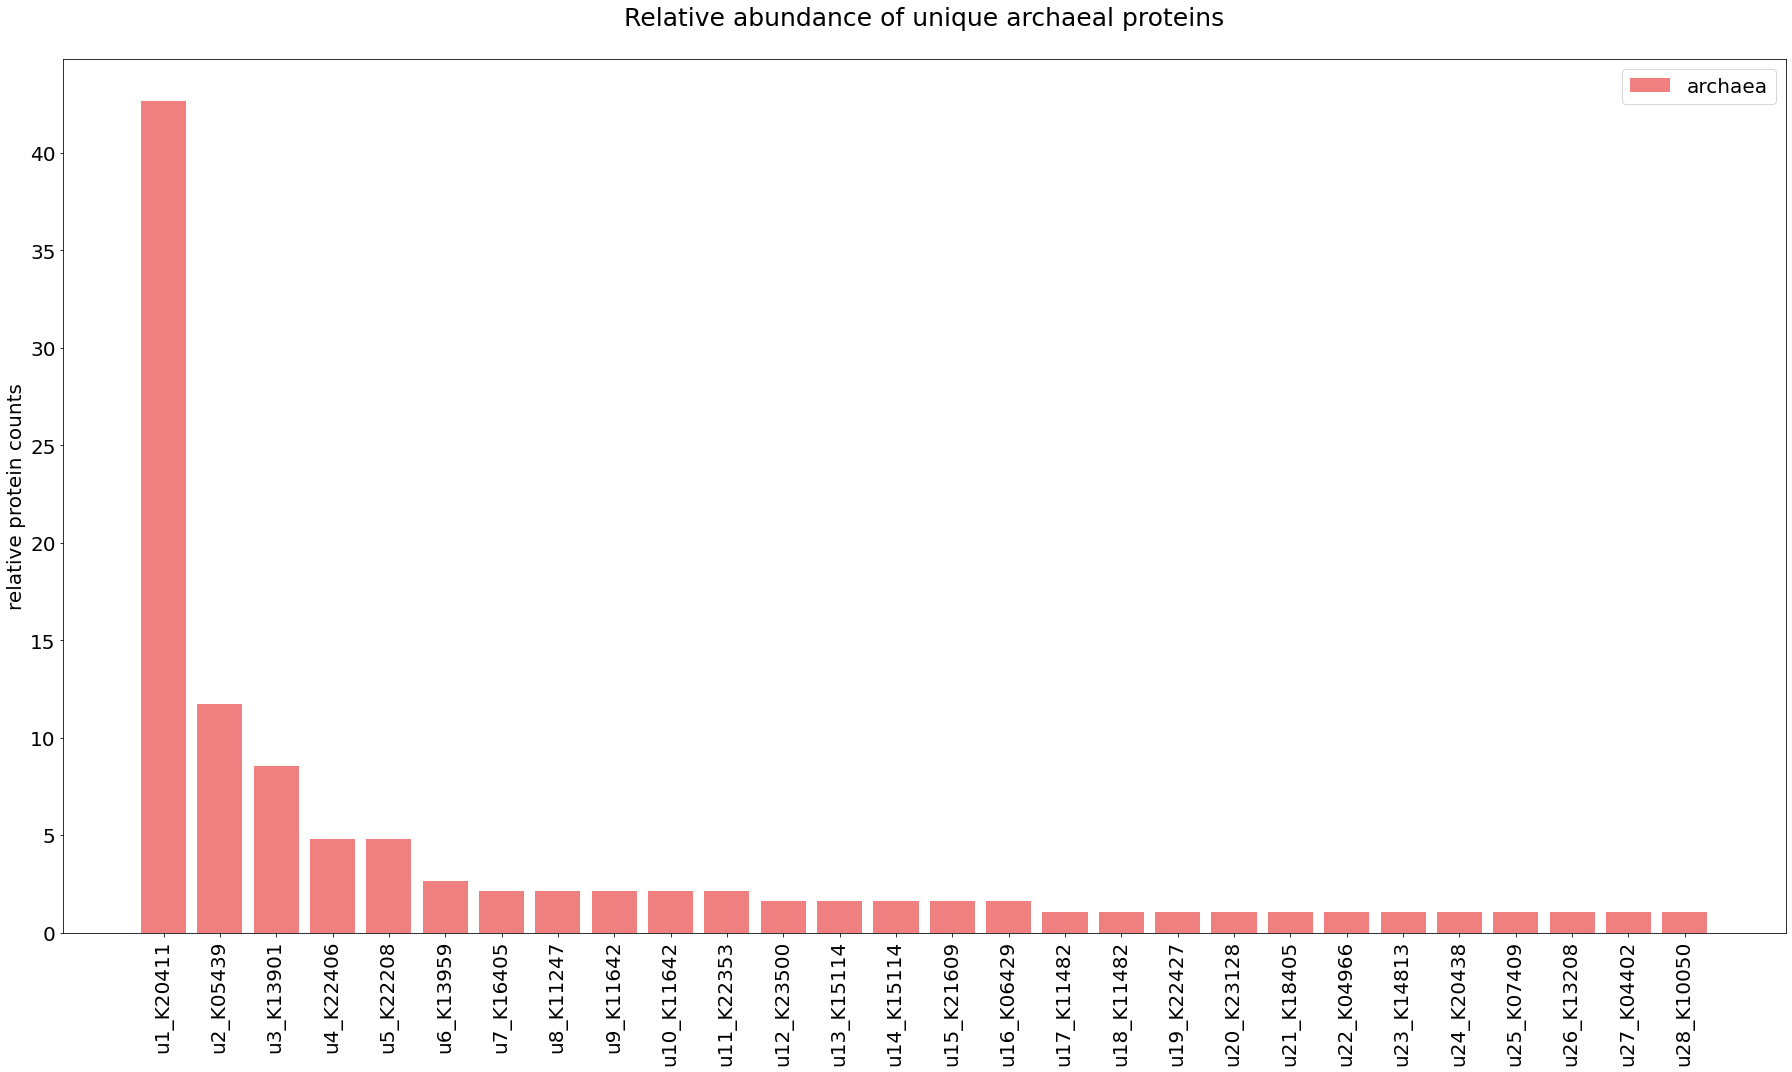

In [27]:
labels = plot_all_curated.arch_cluster_kegg
width = 0.6

fig, ax = plt.subplots()

fig.set_figwidth(25)
fig.set_figheight(15)

ax.bar(labels, plot_all_curated.protein_count, label='archaea', color = 'lightcoral')

ax.set_ylabel('relative protein counts', fontsize = 20)

ax.set_title('Relative abundance of unique archaeal proteins\n', fontsize = 25)
ax.legend(fontsize = 20)

plt.xticks(fontsize = 20, rotation = 90)
plt.yticks(fontsize = 20)

plt.tight_layout()

plt.savefig('/work/projects/ecosystem_biology/archaea/coevolution/analysis/intermediate_results/pics/\
relative_abundance_arch_unique_kegg.tiff', 
            format='tiff', dpi=300)

plt.show()